In [115]:
#Importando pacotes que serão utilizados para a resolução do exercício
import numpy as np

import networkx as ntx
from networkx.algorithms import tree
# import momepy
import matplotlib.pyplot as plt
import pandas as pd
from haversine import haversine, Unit

import random
from itertools import combinations
from math import comb

A soma dos graus de todos os vértices de um grafo G é duas vezes o número de arestas
Dado o grafo $G(V,E)$
$$
\sum_{v \in V}{G(v)} = 2 . |E|
$$

Se queremos que $ |E| = 2|N| $, então, um grafo com todos os vértices de mesmo grau $degree(G)$:

$$
|N|degree(G) = 2 . 2|N|

\implies degree(G) = 4
$$

Para facilitar o processo de criação de grafos aleatórios, será considerado que cada vértice possui um grau maior que $4$

In [138]:
def get_distance(x1,x2,y1,y2):
    """
    Retorna distância euclidiana dado dois pontos (x1,y1) e (x2,y2)
    """
    dist = ((x1 - x2)**2 + (y1- y2)**2)**(1/2)
    return dist

def generate_random_graph(n, max_degree, seed=2):
    """
    Entrada
    ----------
    n (int):                Número de vértices do grafo
    max_degree (int) [4,n]: Maior grau possível de cada vértice
    seed (int):             Semente do gerador random
    ----------
    Saída:
    G: Grafo                Grafo gerado
    ----------
    """
    #Gera erro caso o grau esperado seja maior que o número de nós do grafo
    if(max_degree > n):
        raise Exception("O grau máximo deve ser menor que o número de vértices")

    #Atribui uma seed para o random
    random.seed(seed)

    #Gera uma lista aleatória com o grau esperado para cada nó, variando no intervalo [4 , max_degree]
    expected_degree = [random.randint(4,max_degree) for _ in range(n)]
    G = ntx.expected_degree_graph(expected_degree, seed=None, selfloops=False)

    #Transforma em um grafo não orientado
    ntx.to_undirected(G)

    #Atribui uma coordenada aleatória para cada vértice, simulando a latitude e longitude pos = (x,y)
    for node in ntx.nodes(G):
        ntx.set_node_attributes(G,{node:{"pos":(random.uniform(0,5),random.uniform(0,5))}})
         
    #Atribui um peso a cada aresta
    for edge in ntx.edges(G):
        ntx.set_edge_attributes(G,{edge:{"weight":round(get_distance(G.nodes[edge[0]]['pos'][0], G.nodes[edge[1]]['pos'][0], G.nodes[edge[0]]['pos'][1], G.nodes[edge[1]]['pos'][1]),2)}})        
    return G

def get_minimum_spanning_tree(G, algoritmo):
  """
  Função retorna a árvore geradora mínima
  Retorna as arestas que devem ser conectadas para que a distância total seja mínima
  """
  if algoritmo not in ['kruskal','prim']:
        raise Exception("O algoritmo deve ser de Kruskal ou Prim")

  E = ntx.algorithms.tree.minimum_spanning_edges(G, algorithm=algoritmo, data=False)
  edges = list(E)
  sorted_edges = sorted(sorted(x) for x in edges)
  return sorted_edges

def draw_graph(
    G,
    has_edgeslabel = False,
    edgelist=[],
    title = '',
    save_image = False,
    bigTree= False
    ):
    """
    Entrada
    --------
    G:                            Grafo a ser desenhado
    has_edgeslabel (Boolean):     Booleano que determina se as arestas dos grafos possuem labels
    edgelist:                     Lista com as arestas que deseja desenhar
    title (str):                  Titulo da imagem gerada
    
    Saída
    --------
    None    
    """
    f,ax = plt.subplots(figsize=(12,8), dpi=300)
    
    #Gera uma lista de coordenadas x e y com a posição de cada vértice
    pos = ntx.get_node_attributes(G,'pos')
    x = []
    y = []
    for i in range(len(pos)):
        x.append(pos[i][0])
        y.append(pos[i][1])

    #Desenha as arestas de acordo com o problema
    if not has_edgeslabel:
        ntx.draw_networkx_edges(G, pos=pos, edge_color='dimgray',alpha=0.35)
    else:
        edge_labels = dict([((tuple(e1), G[e1[0]][e1[1]]["weight"]))
                    for e1 in edgelist])
        ntx.draw_networkx_edges(G,pos=pos, edgelist=edgelist, edge_color='r', label='weight')
        if not bigTree:
            ntx.draw_networkx_edge_labels(G, pos, edge_labels, rotate = True, font_size = 8)
    sc = plt.scatter(x,y,edgecolor={'black'})

    #Adiciona o nome em cima de cada vértice
    eps=0.04
    if (has_edgeslabel and not bigTree):
        for i, txt in enumerate(range(len(pos))):
            plt.annotate(txt, (x[i]+eps, y[i]+eps))

    #Configurações do matplotlib
    plt.title(title)    

    #Save image
    if save_image:
        plt.savefig(title.replace(' ','_'))
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.grid(True)

    #plt.show()

def get_random_list_of_edges(n):
    """
    Gera n combinações de arestas (Excluindo self-loops)
    """
    if comb(n,2) < n*3:
        return list(combinations(range(n), r = 2))
    else:
        return random.sample(list(combinations(range(n), r = 2)),3*n)

Gerando mapa de cidade, com posições aleatórias

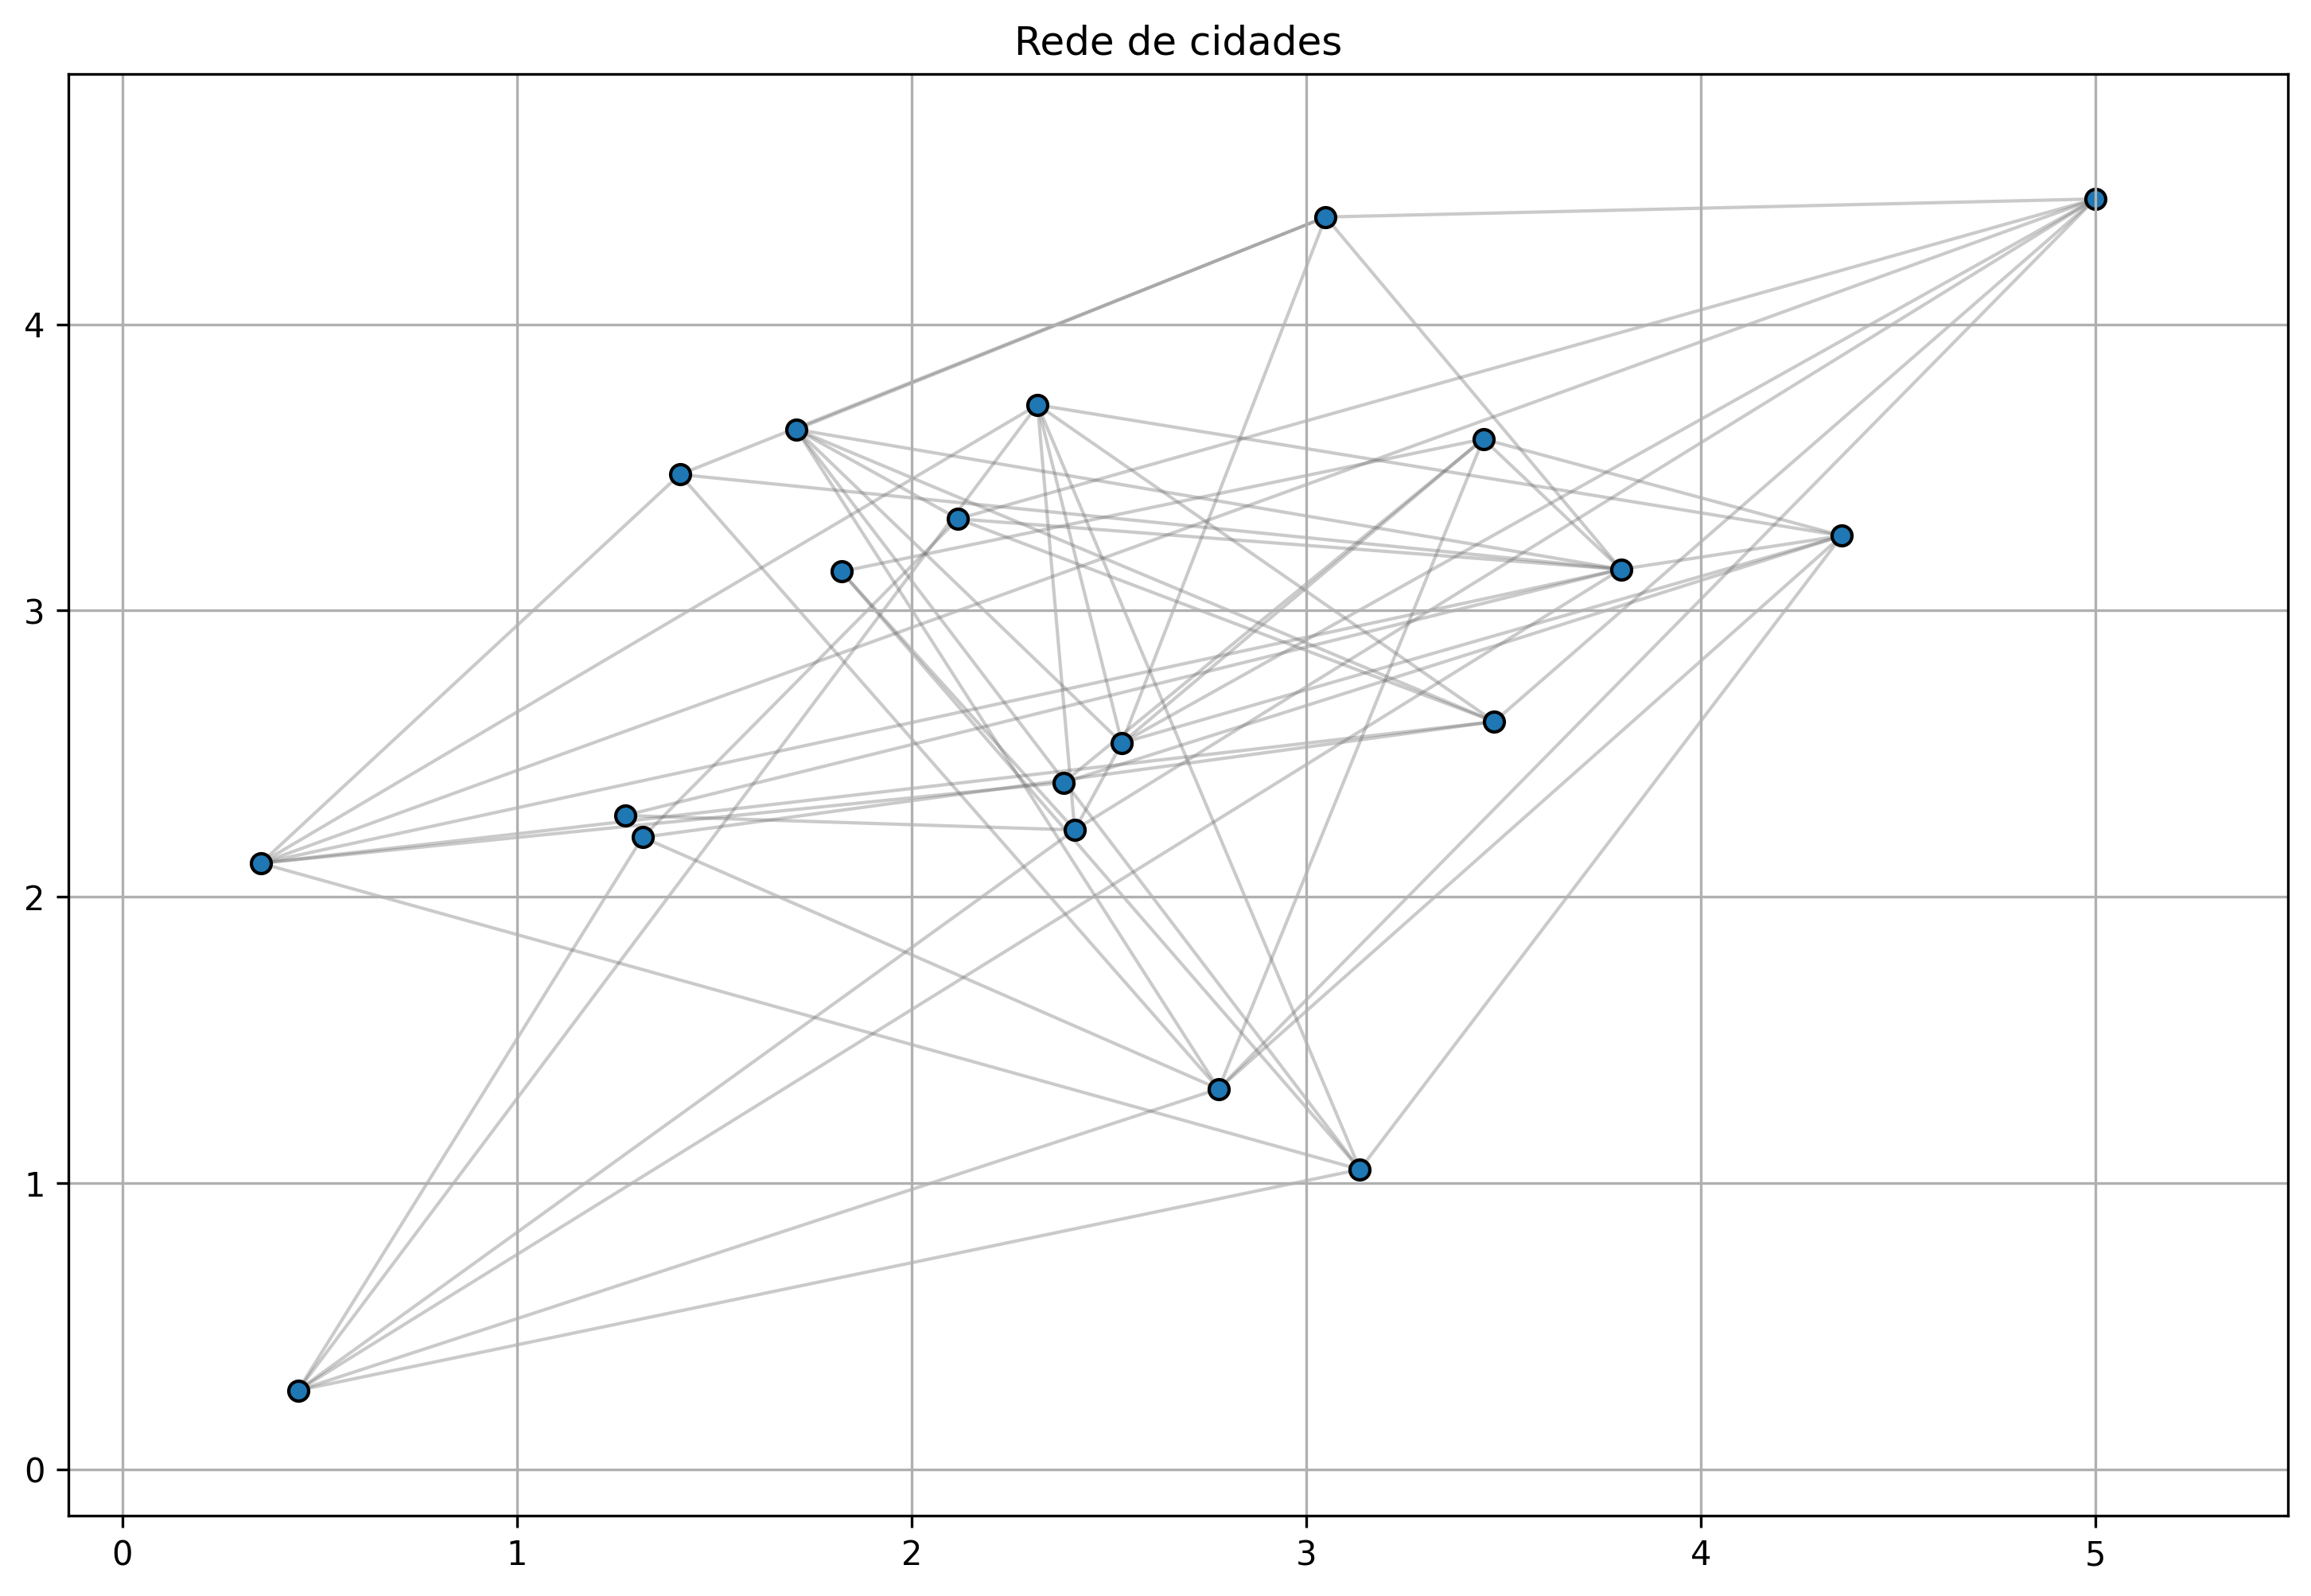

In [117]:
#Dados iniciais para gerar o grafo aleatório
n = 20
n_max_arestas = 8

#---------------------------------
G = generate_random_graph(n, n_max_arestas, seed=10)
draw_graph(G, title='Rede de cidades',  save_image = True)

#Gera 3n arestas possíveis
g_random_edges = get_random_list_of_edges(n)

#Calcula a distância mínima para ir de uma cidade aleatória A para uma cidade aleatória B
min_distance = []
for edge in g_random_edges:
    min_distance.append({"edge":edge,"min_dist":ntx.dijkstra_path_length(G,edge[0],edge[1],weight='weight')})
    

In [118]:
results = pd.DataFrame(min_distance)
results.head()

,edge,min_dist
0,"(16, 17)",1.70
1,"(6, 11)",4.69
2,"(2, 9)",3.16
3,"(11, 12)",2.67
4,"(6, 14)",3.88


In [119]:
#Aplicando o método de dijkstra
random_edge_list= get_random_list_of_edges(n)

min_distance = []
for edge in random_edge_list:
    res = round(ntx.dijkstra_path_length(G,edge[0], edge[1],weight='weight'),2)
    min_distance.append(res)
    if not G.has_edge(edge[0], edge[1]):
        G.add_edge(edge[0], edge[1], weight = round(res,2))

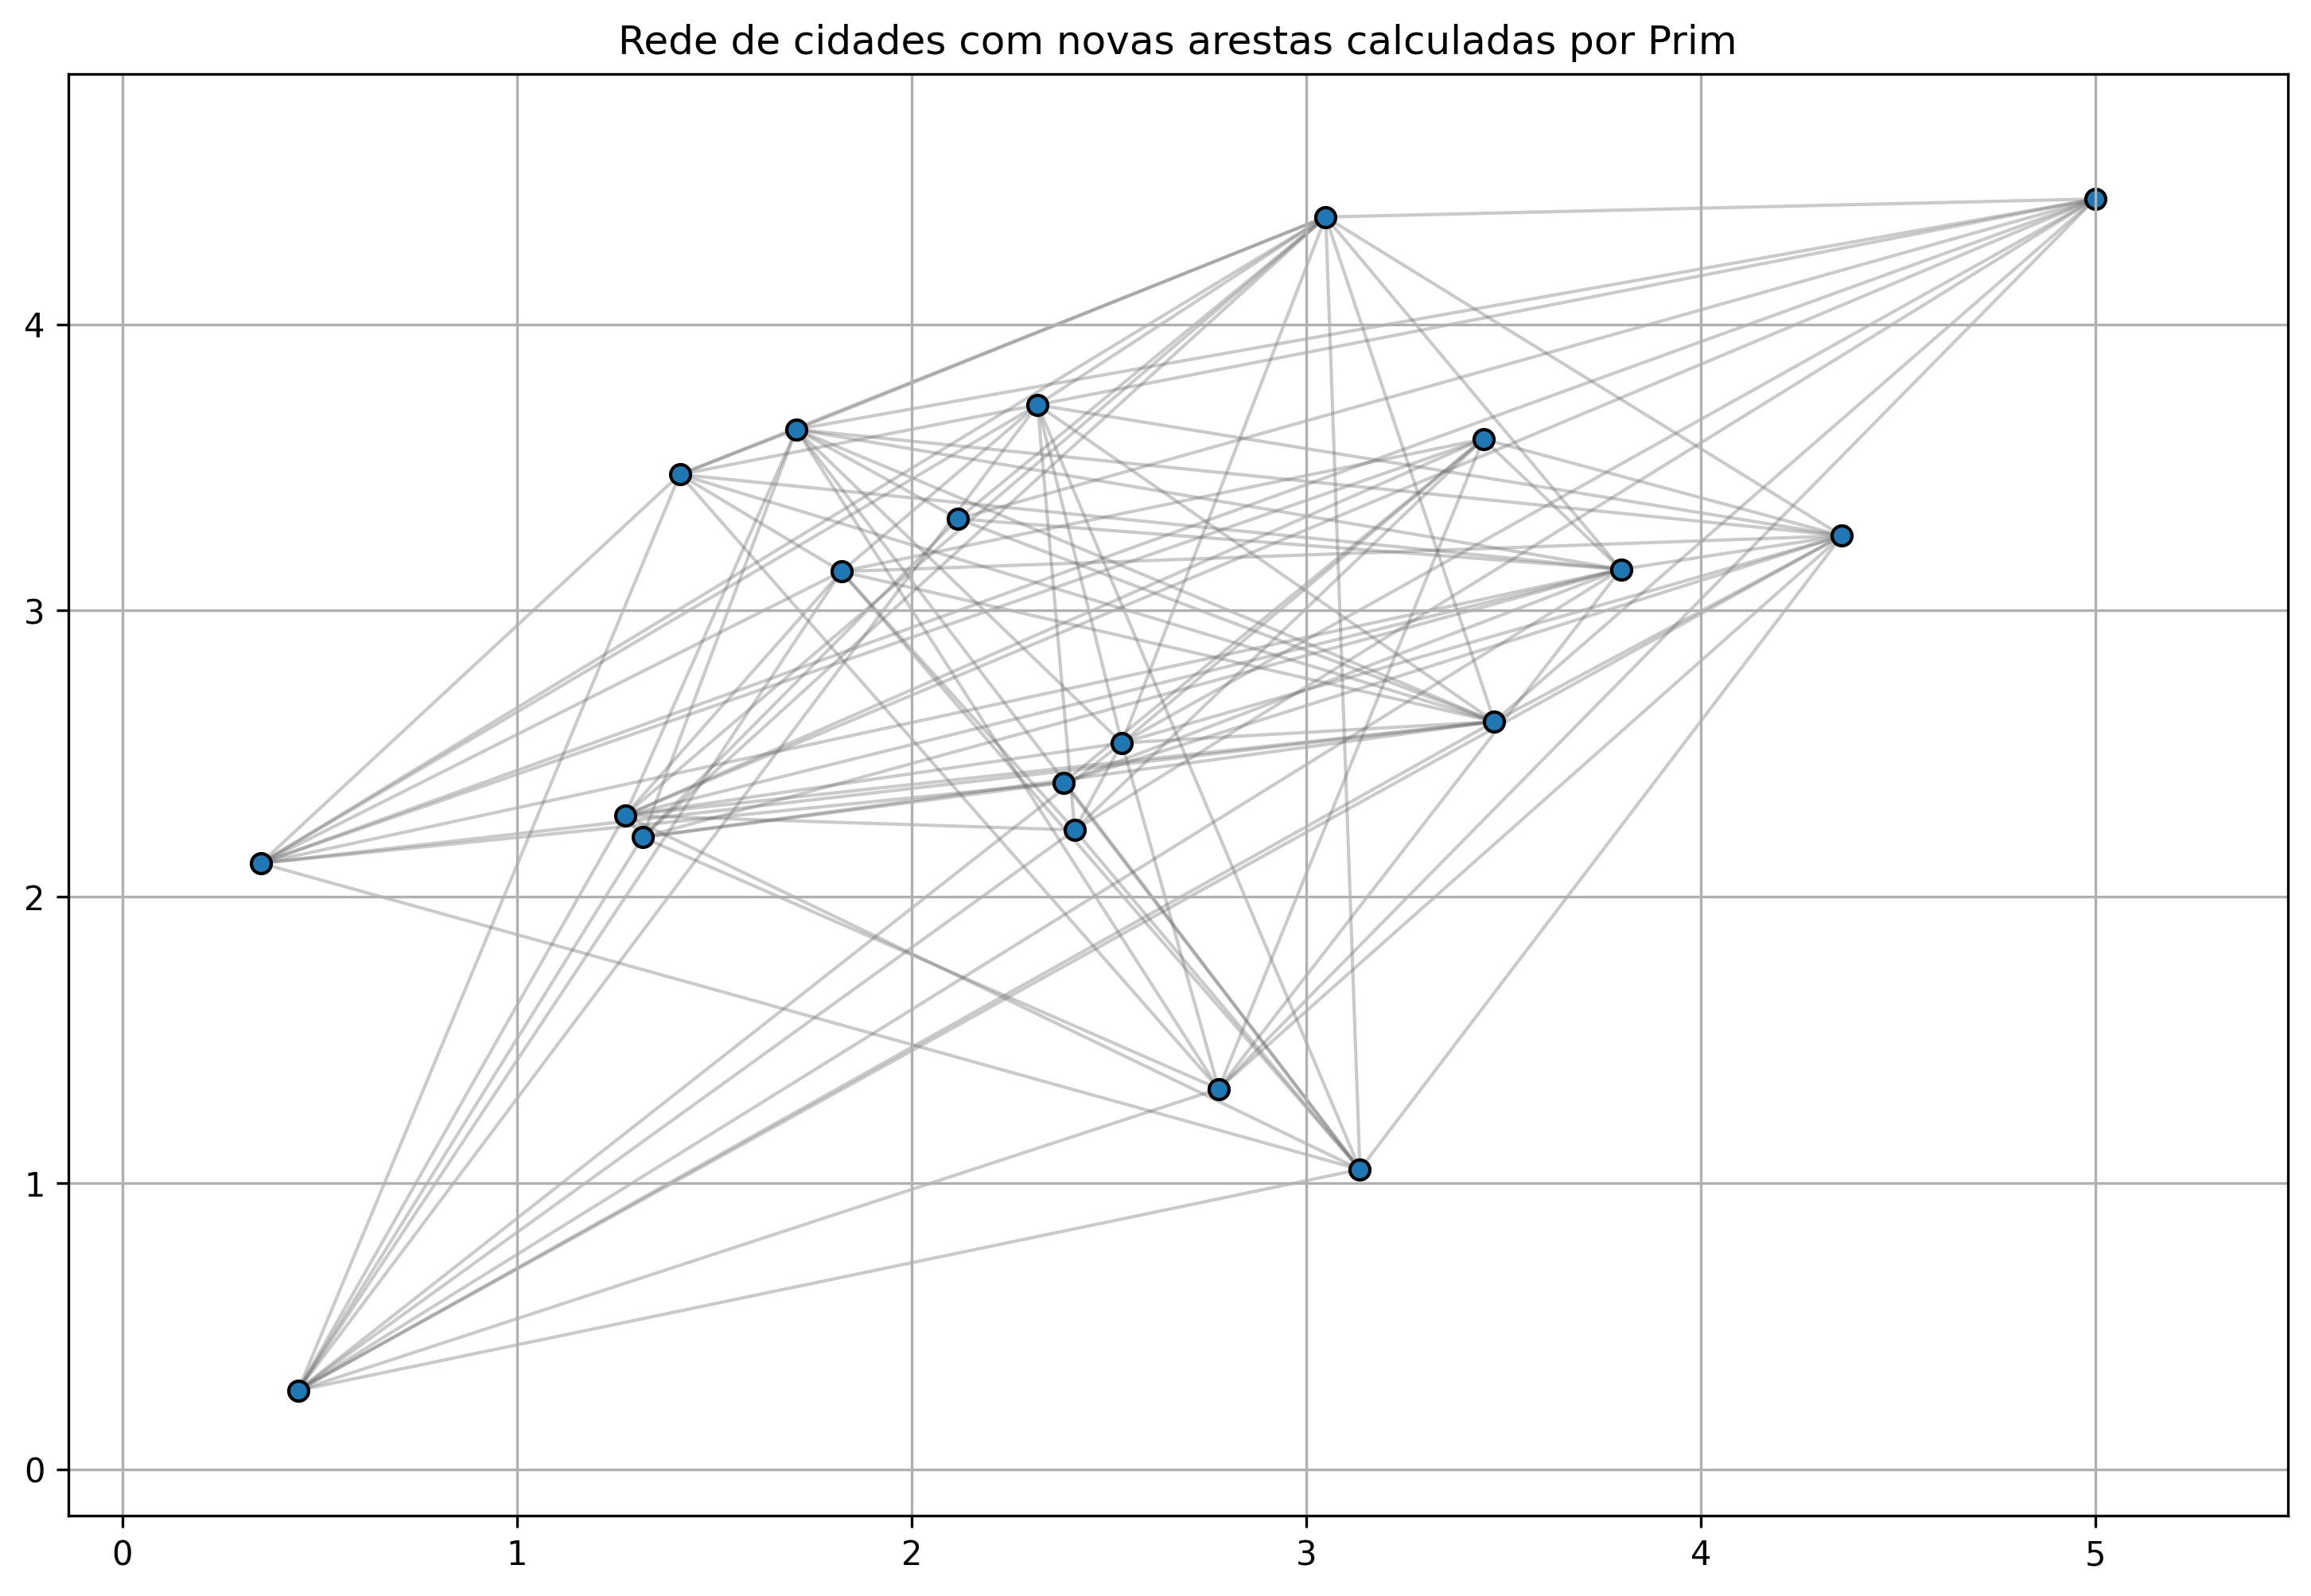

In [120]:
draw_graph(G,title = "Rede de cidades com novas arestas calculadas por Prim", save_image = True)

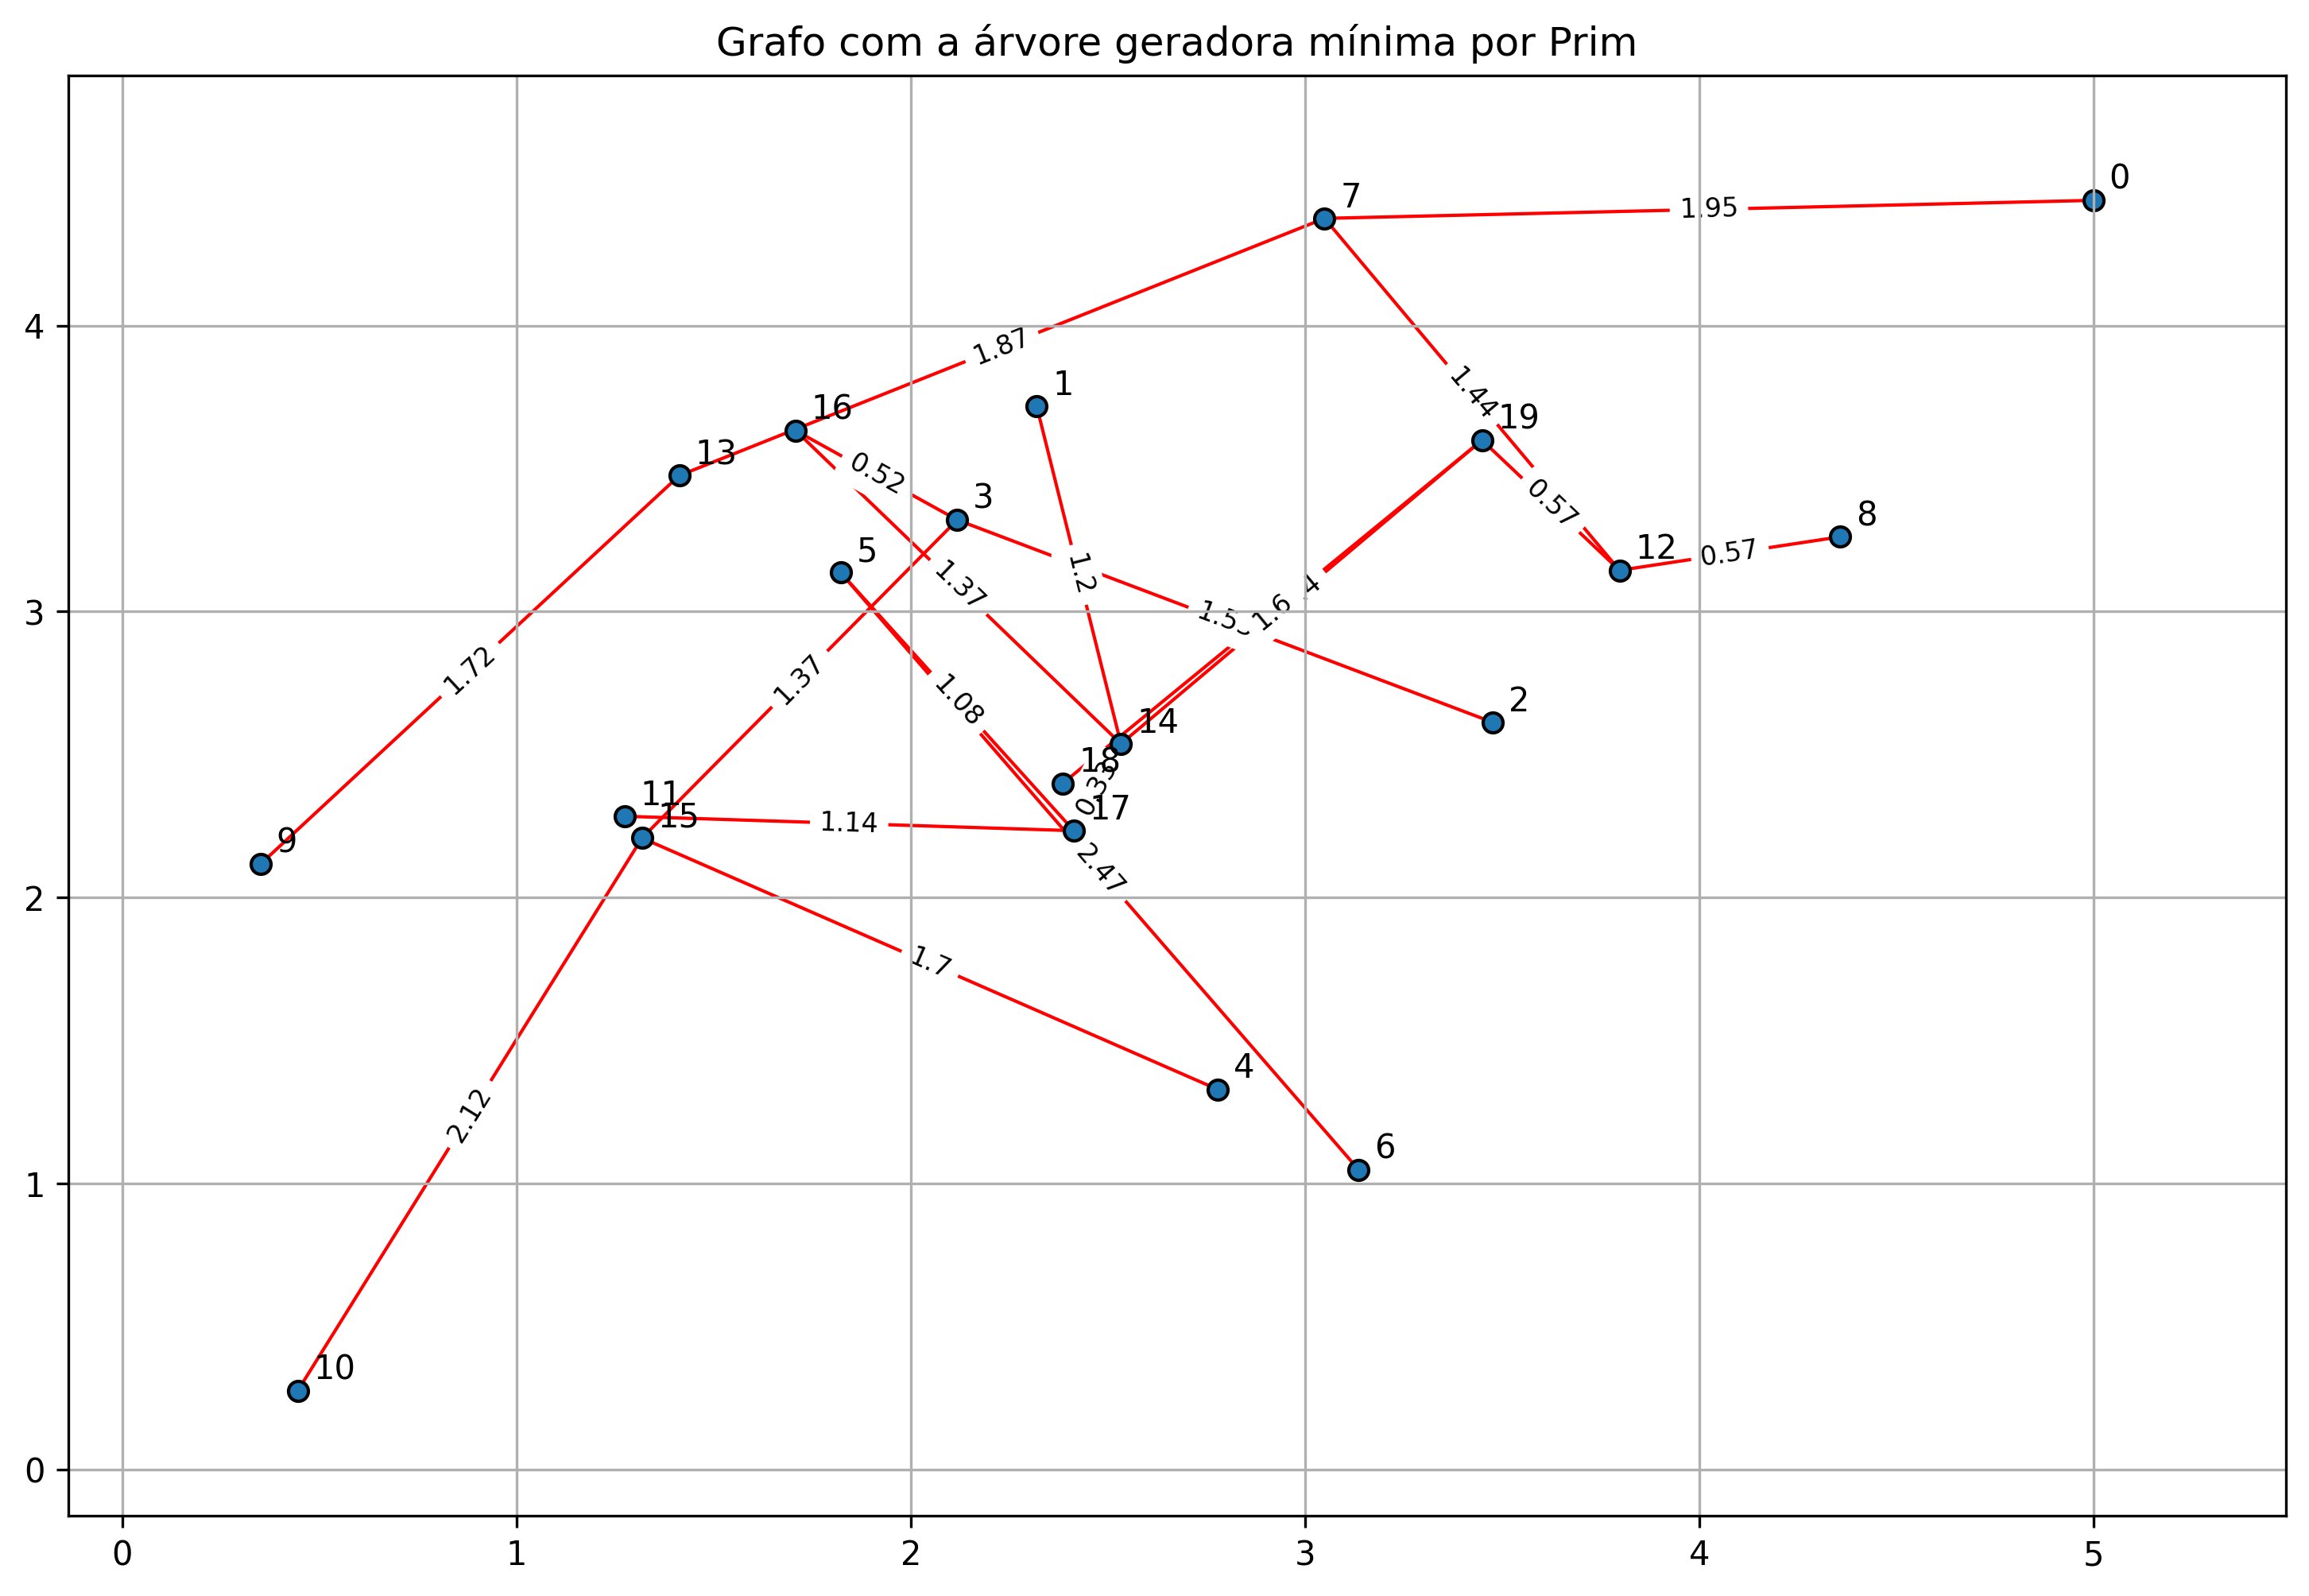

In [121]:
E = get_minimum_spanning_tree(G, 'prim')
draw_graph(G, has_edgeslabel = True, edgelist=E,title="Grafo com a árvore geradora mínima por Prim", save_image = True)

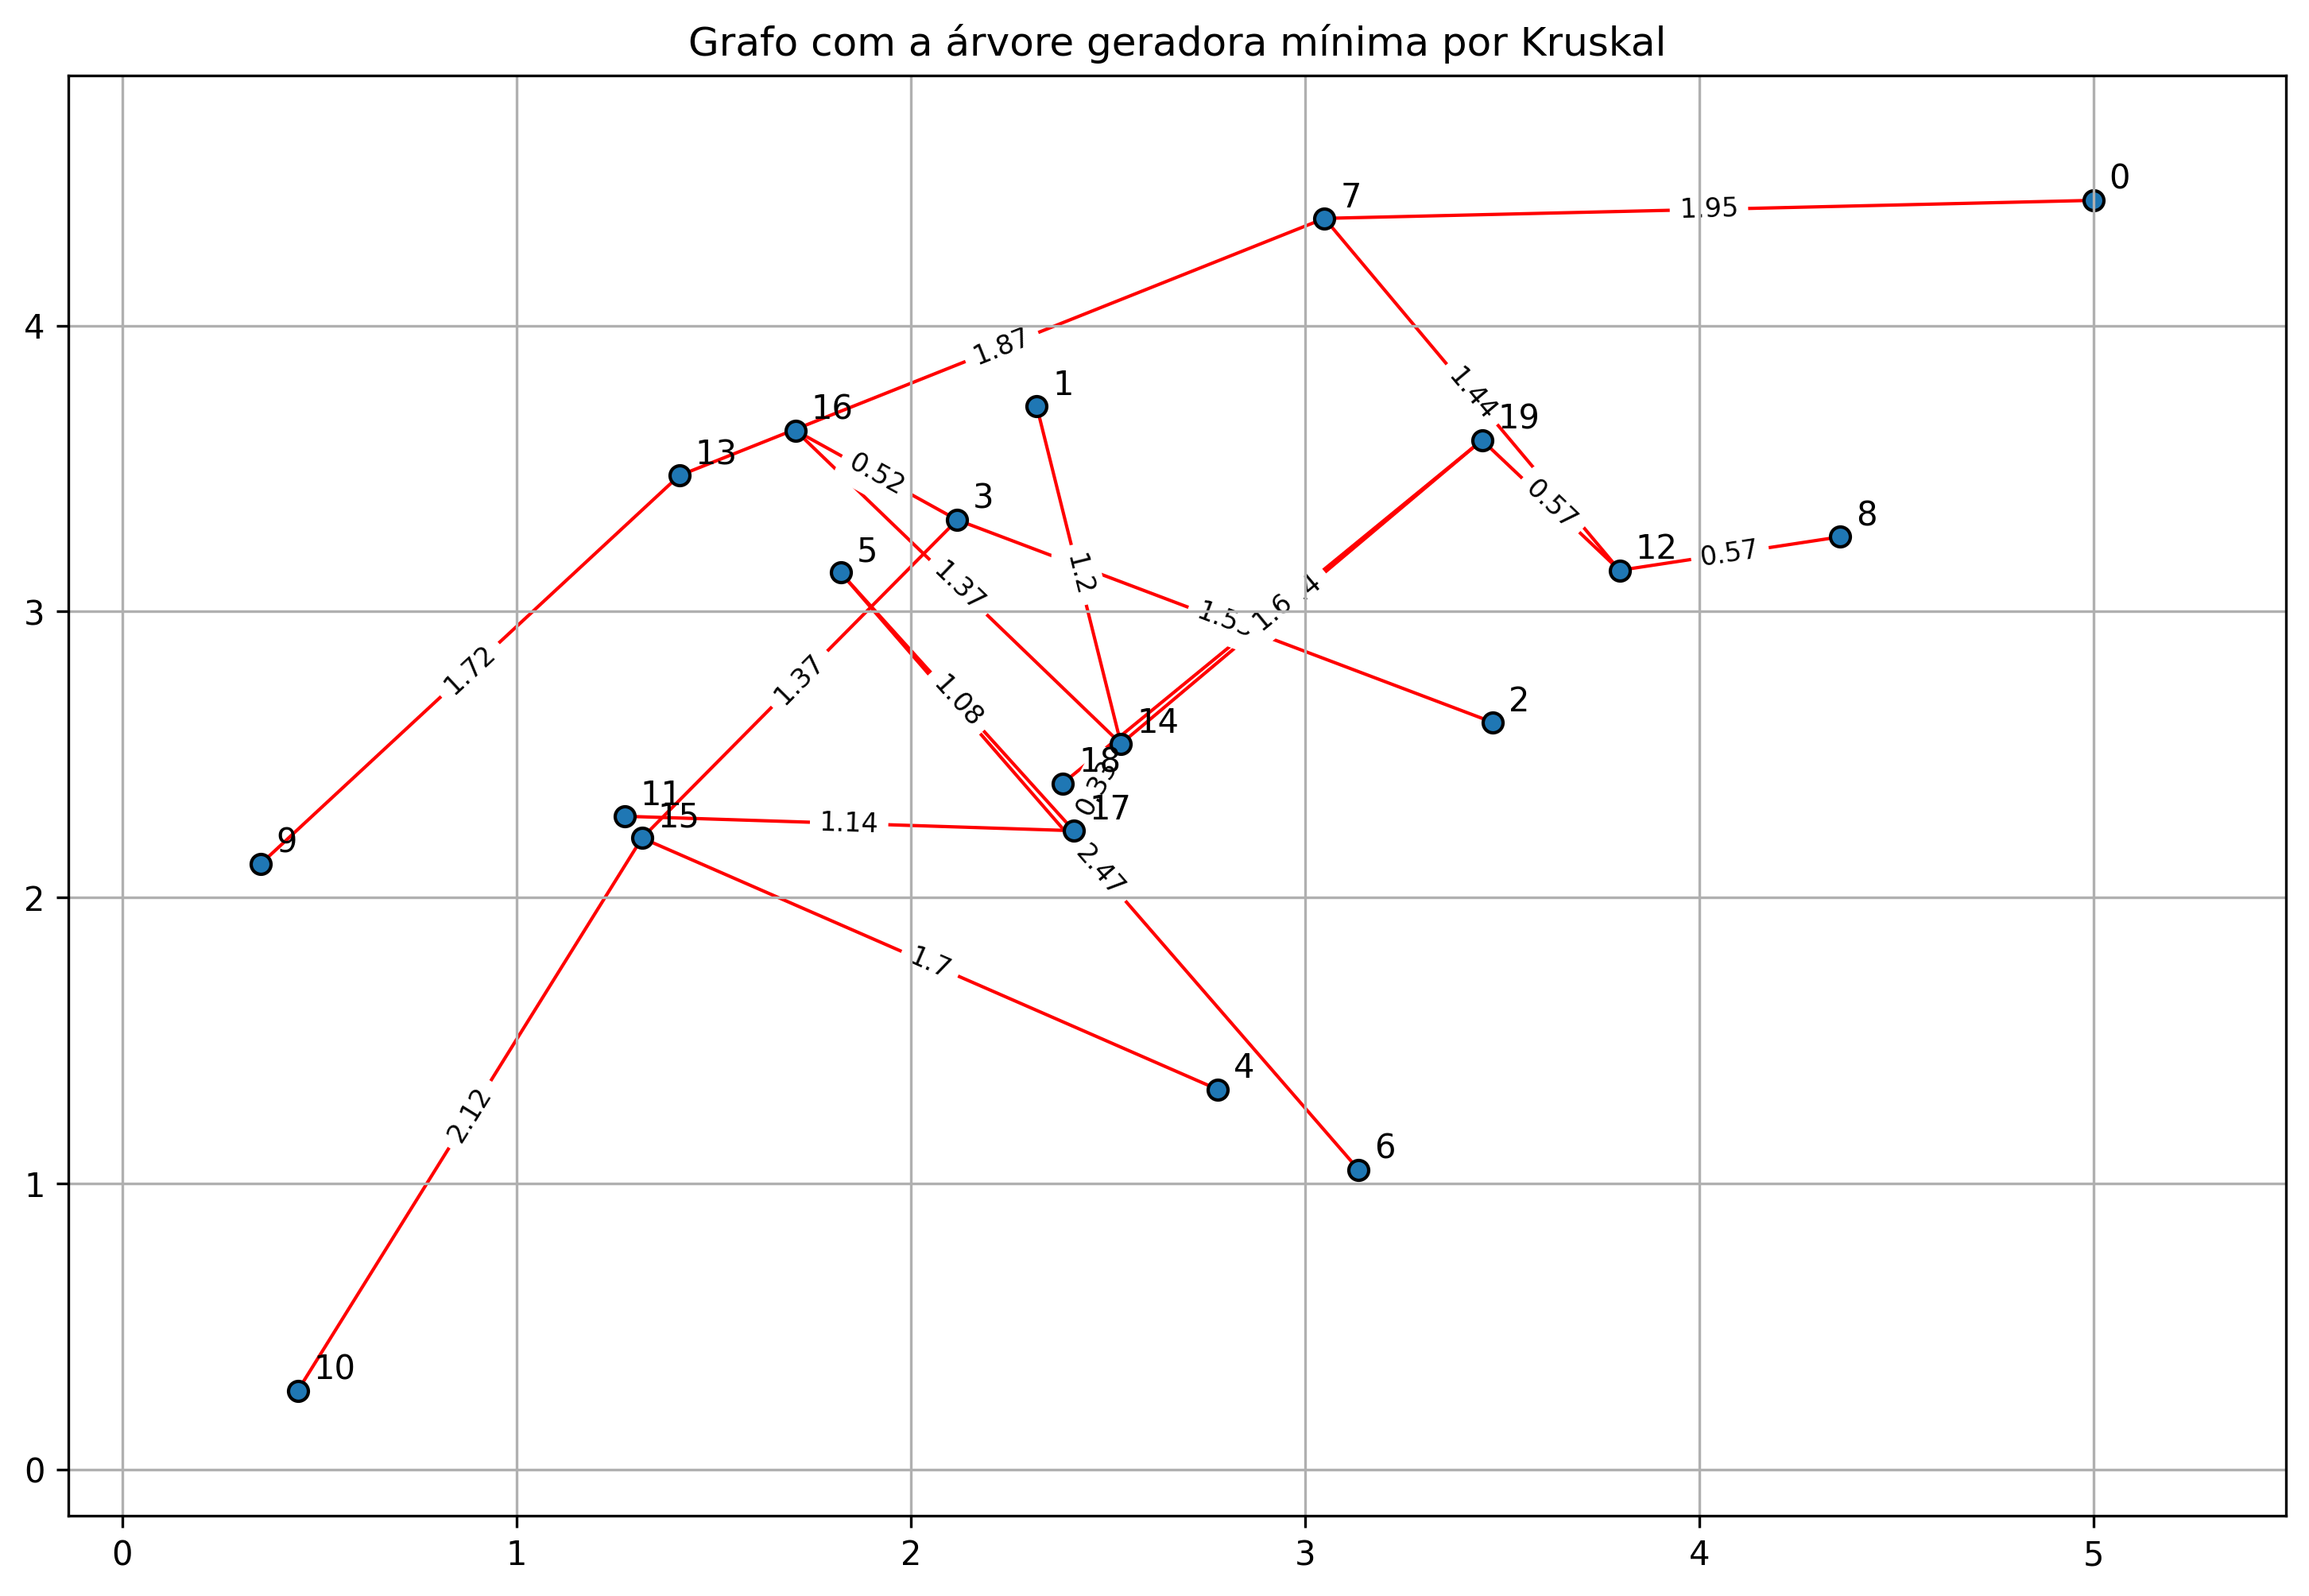

In [122]:
E = get_minimum_spanning_tree(G, 'kruskal')
draw_graph(G, has_edgeslabel = True, edgelist=E,title="Grafo com a árvore geradora mínima por Kruskal",  save_image = True)

In [149]:
import time
time_delta_prim = []
number_of_nodes = [10000, 50000,100000, 500000,1000000, 1500000]

for i in number_of_nodes:
    start_time = time.time()
    get_minimum_spanning_tree(generate_random_graph(i, n_max_arestas, seed=10), 'prim')
    time_delta_prim.append(time.time() - start_time)

print(time_delta_prim)


[0.3281216621398926, 1.9016928672790527, 9.855970621109009, 27.95802354812622, 63.98767876625061, 99.73360443115234]


In [147]:
time_delta_kruskal = []

for i in number_of_nodes:
    start_time = time.time()
    get_minimum_spanning_tree(generate_random_graph(i, n_max_arestas, seed=10), 'kruskal')
    time_delta_kruskal.append(time.time() - start_time)

print(time_delta_kruskal)

[0.3670041561126709, 8.76608681678772, 5.213794708251953, 28.310720443725586, 59.89418697357178, 99.99066209793091]


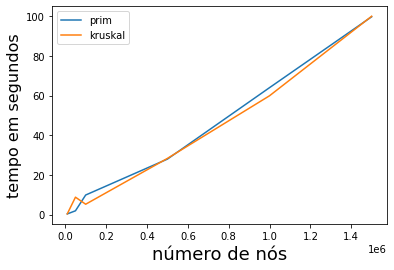

In [150]:
plt.plot(number_of_nodes,time_delta_prim, label = "prim")
plt.plot(number_of_nodes, time_delta_kruskal, label = "kruskal")
plt.legend()
plt.xlabel('número de nós', fontsize=18)
plt.ylabel('tempo em segundos', fontsize=16)
plt.show()

In [126]:
def get_total_edge_weight(G):
    total = 0
    for ed in G.edges:
        total += G.get_edge_data(ed[0], ed[1])['weight']
    return total

In [127]:
#Iterador que percorre as possíveis árvores geradoras
#total_array => Lista com os total calculado de cada árvore geradora

treeIterator = ntx.algorithms.tree.mst.SpanningTreeIterator(G)
stop = 0
Grafos = []
total_array = []

for tree in treeIterator:
    total_array.append(get_total_edge_weight(tree))
    if(stop > 200):
        break
    stop += 1

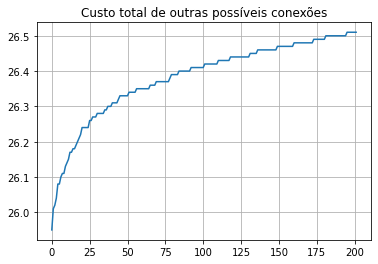

In [128]:
fig, ax = plt.subplots()

plt.plot(np.arange(len(total_array)), total_array)
ax.grid(True)
plt.title("Custo total de outras possíveis conexões")
plt.show()

In [129]:
df = pd.read_excel("LocalidadesSP.xlsx")
print(df)

                   Cidade        Lat       Long
0              ADAMANTINA -21.645716 -51.076923
1                  ADOLFO -21.247302 -49.644592
2                   AGUAÍ -22.072388 -46.980211
3          ÁGUAS DA PRATA -21.869877 -46.708459
4        ÁGUAS DE LINDÓIA -22.473822 -46.631779
..                    ...        ...        ...
640  VISTA ALEGRE DO ALTO -21.167154 -48.630171
641        VITÓRIA BRASIL -20.198739 -50.480807
642            VOTORANTIM -23.548758 -47.483060
643           VOTUPORANGA -20.436703 -49.934239
644              ZACARIAS -21.087248 -50.082173

[645 rows x 3 columns]


In [130]:
SP = ntx.complete_graph(645)
c = 0
for node in ntx.nodes(SP):
        ntx.set_node_attributes(SP,{node:{"Cidade":(df['Cidade'][c])}})
        ntx.set_node_attributes(SP,{node:{"lalo":(df['Lat'][c],df['Long'][c])}})
        ntx.set_node_attributes(SP,{node:{"pos":(df['Long'][c],df['Lat'][c])}})
        c = c+1
for edge in ntx.edges(SP):
        ntx.set_edge_attributes(SP,{edge:{"weight":round(haversine((SP.nodes[edge[0]]['lalo'][0], SP.nodes[edge[0]]['lalo'][1]), (SP.nodes[edge[1]]['lalo'][0], SP.nodes[edge[1]]['lalo'][1])))}})


In [131]:
print(SP)

Graph with 645 nodes and 207690 edges


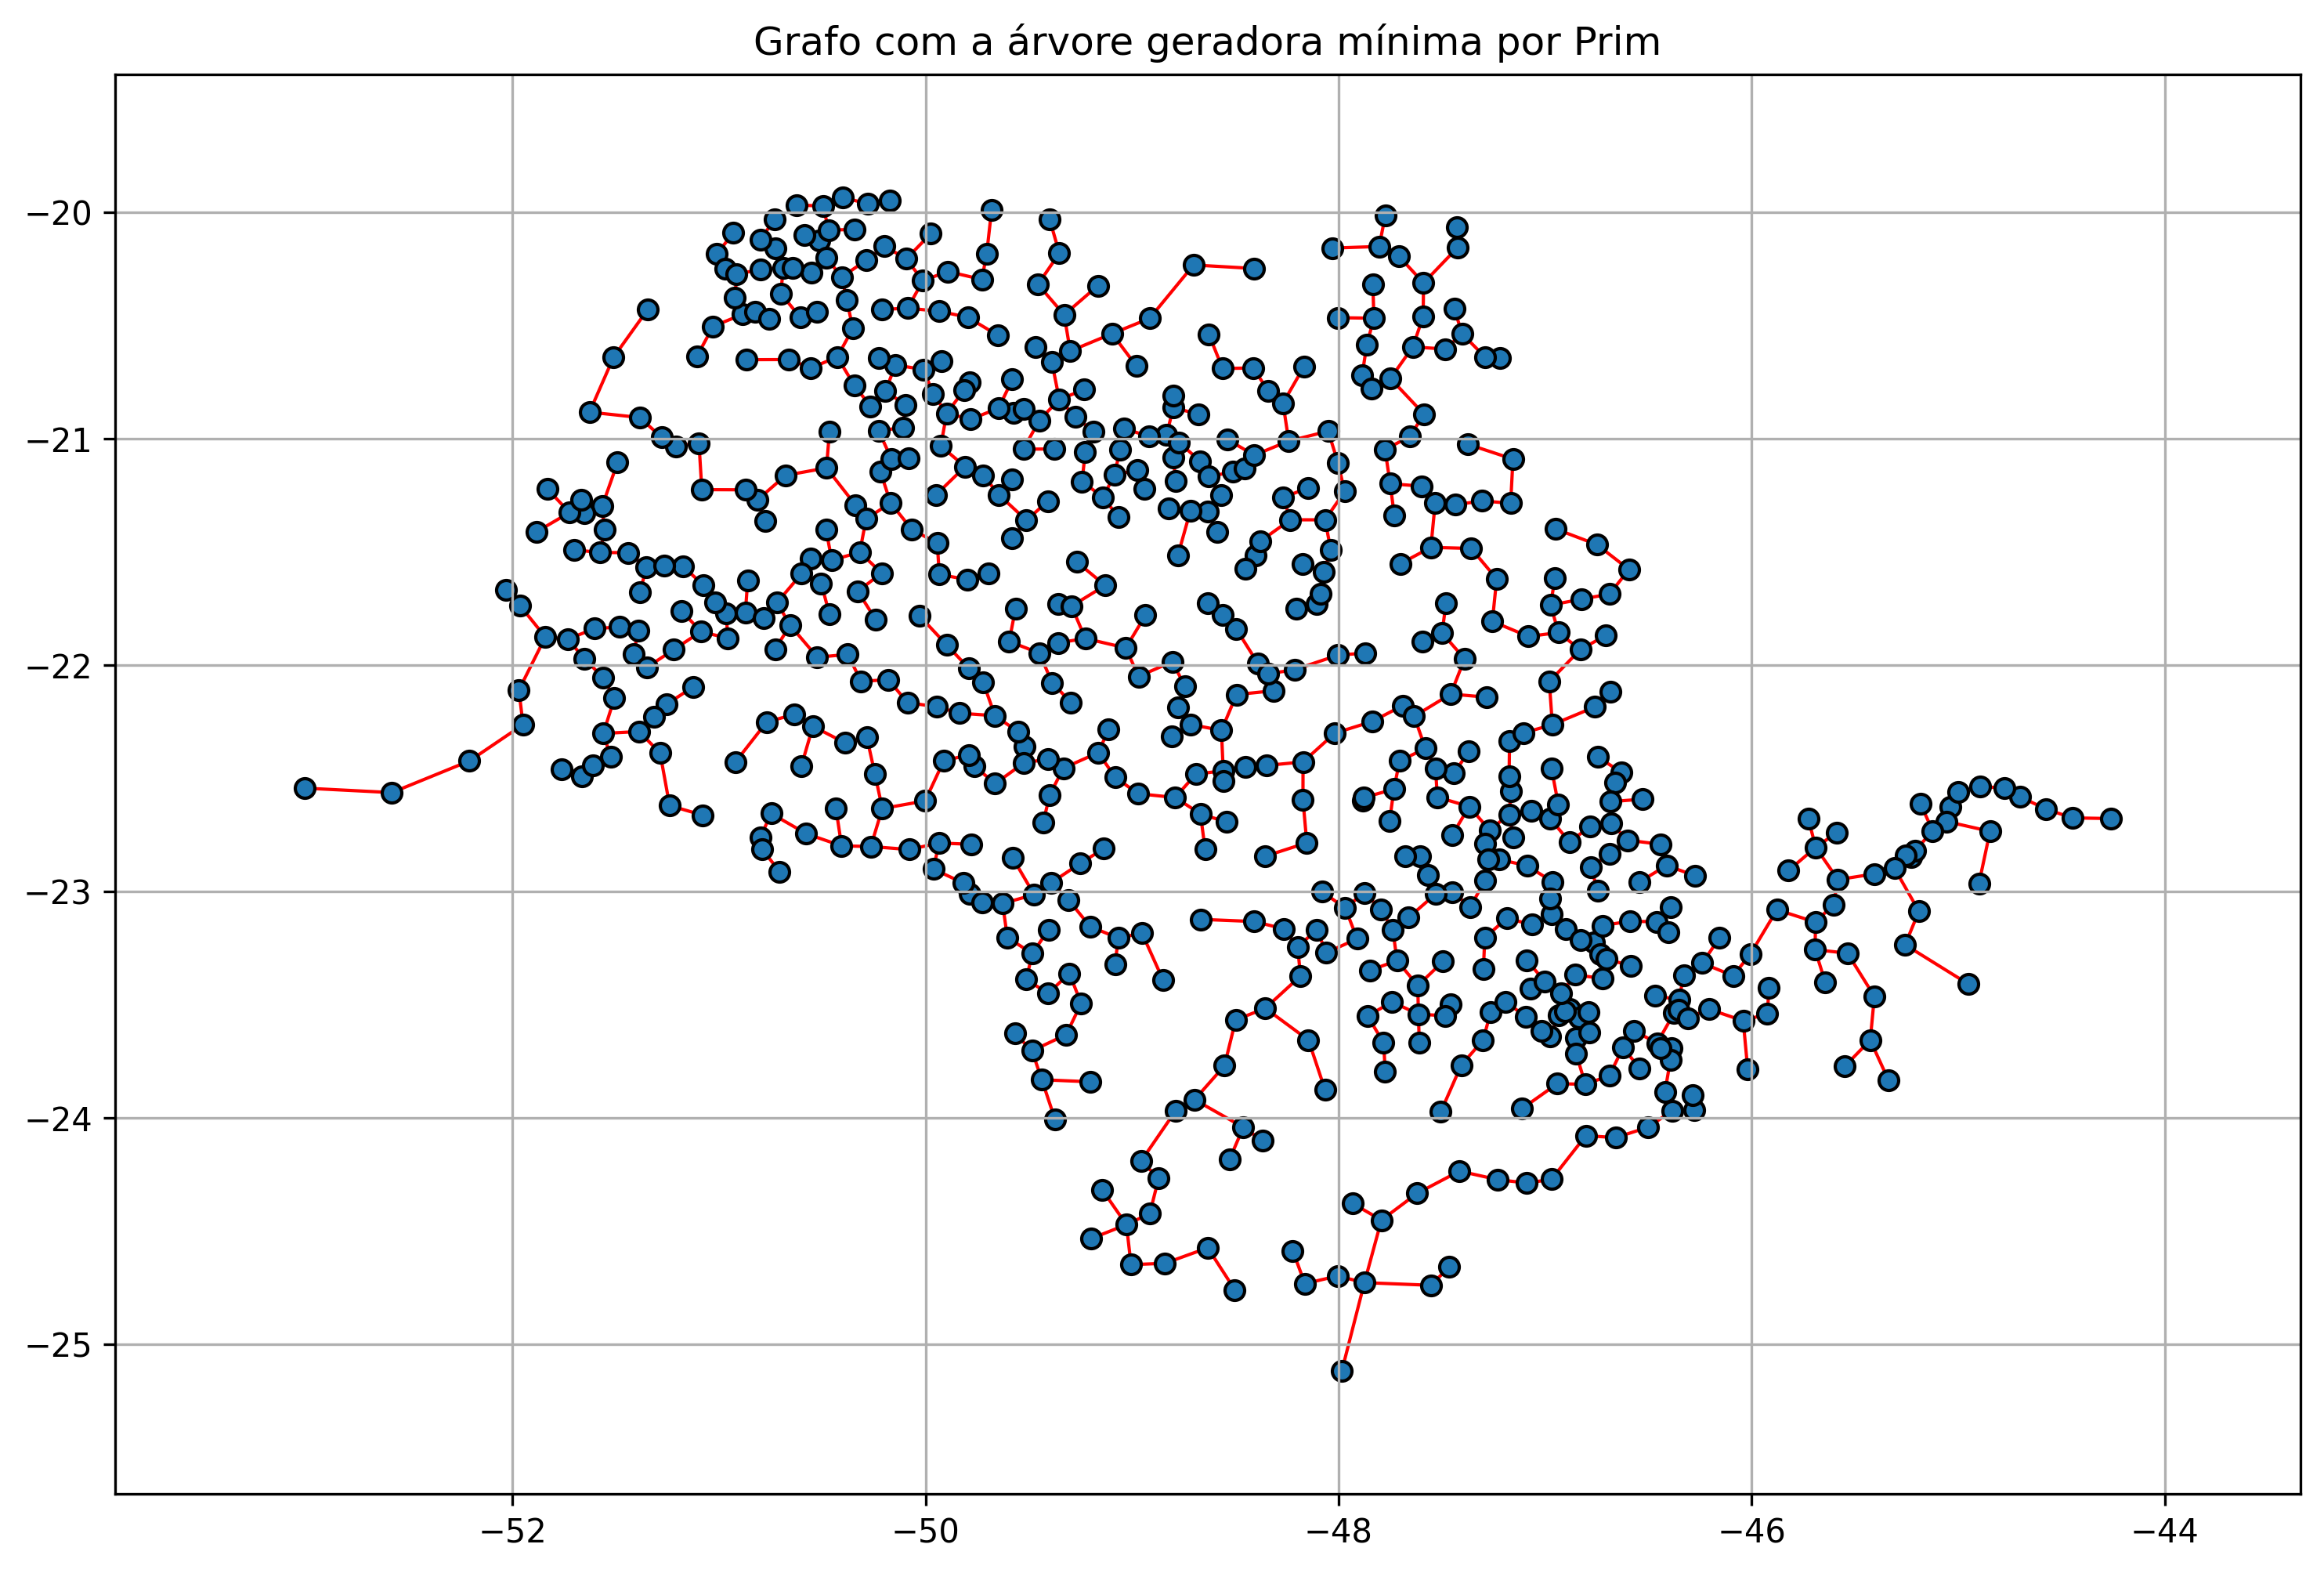

In [139]:
E = get_minimum_spanning_tree(SP, 'prim')

draw_graph(SP, has_edgeslabel = True, edgelist=E,title="Grafo com a árvore geradora mínima por Prim", bigTree= True)

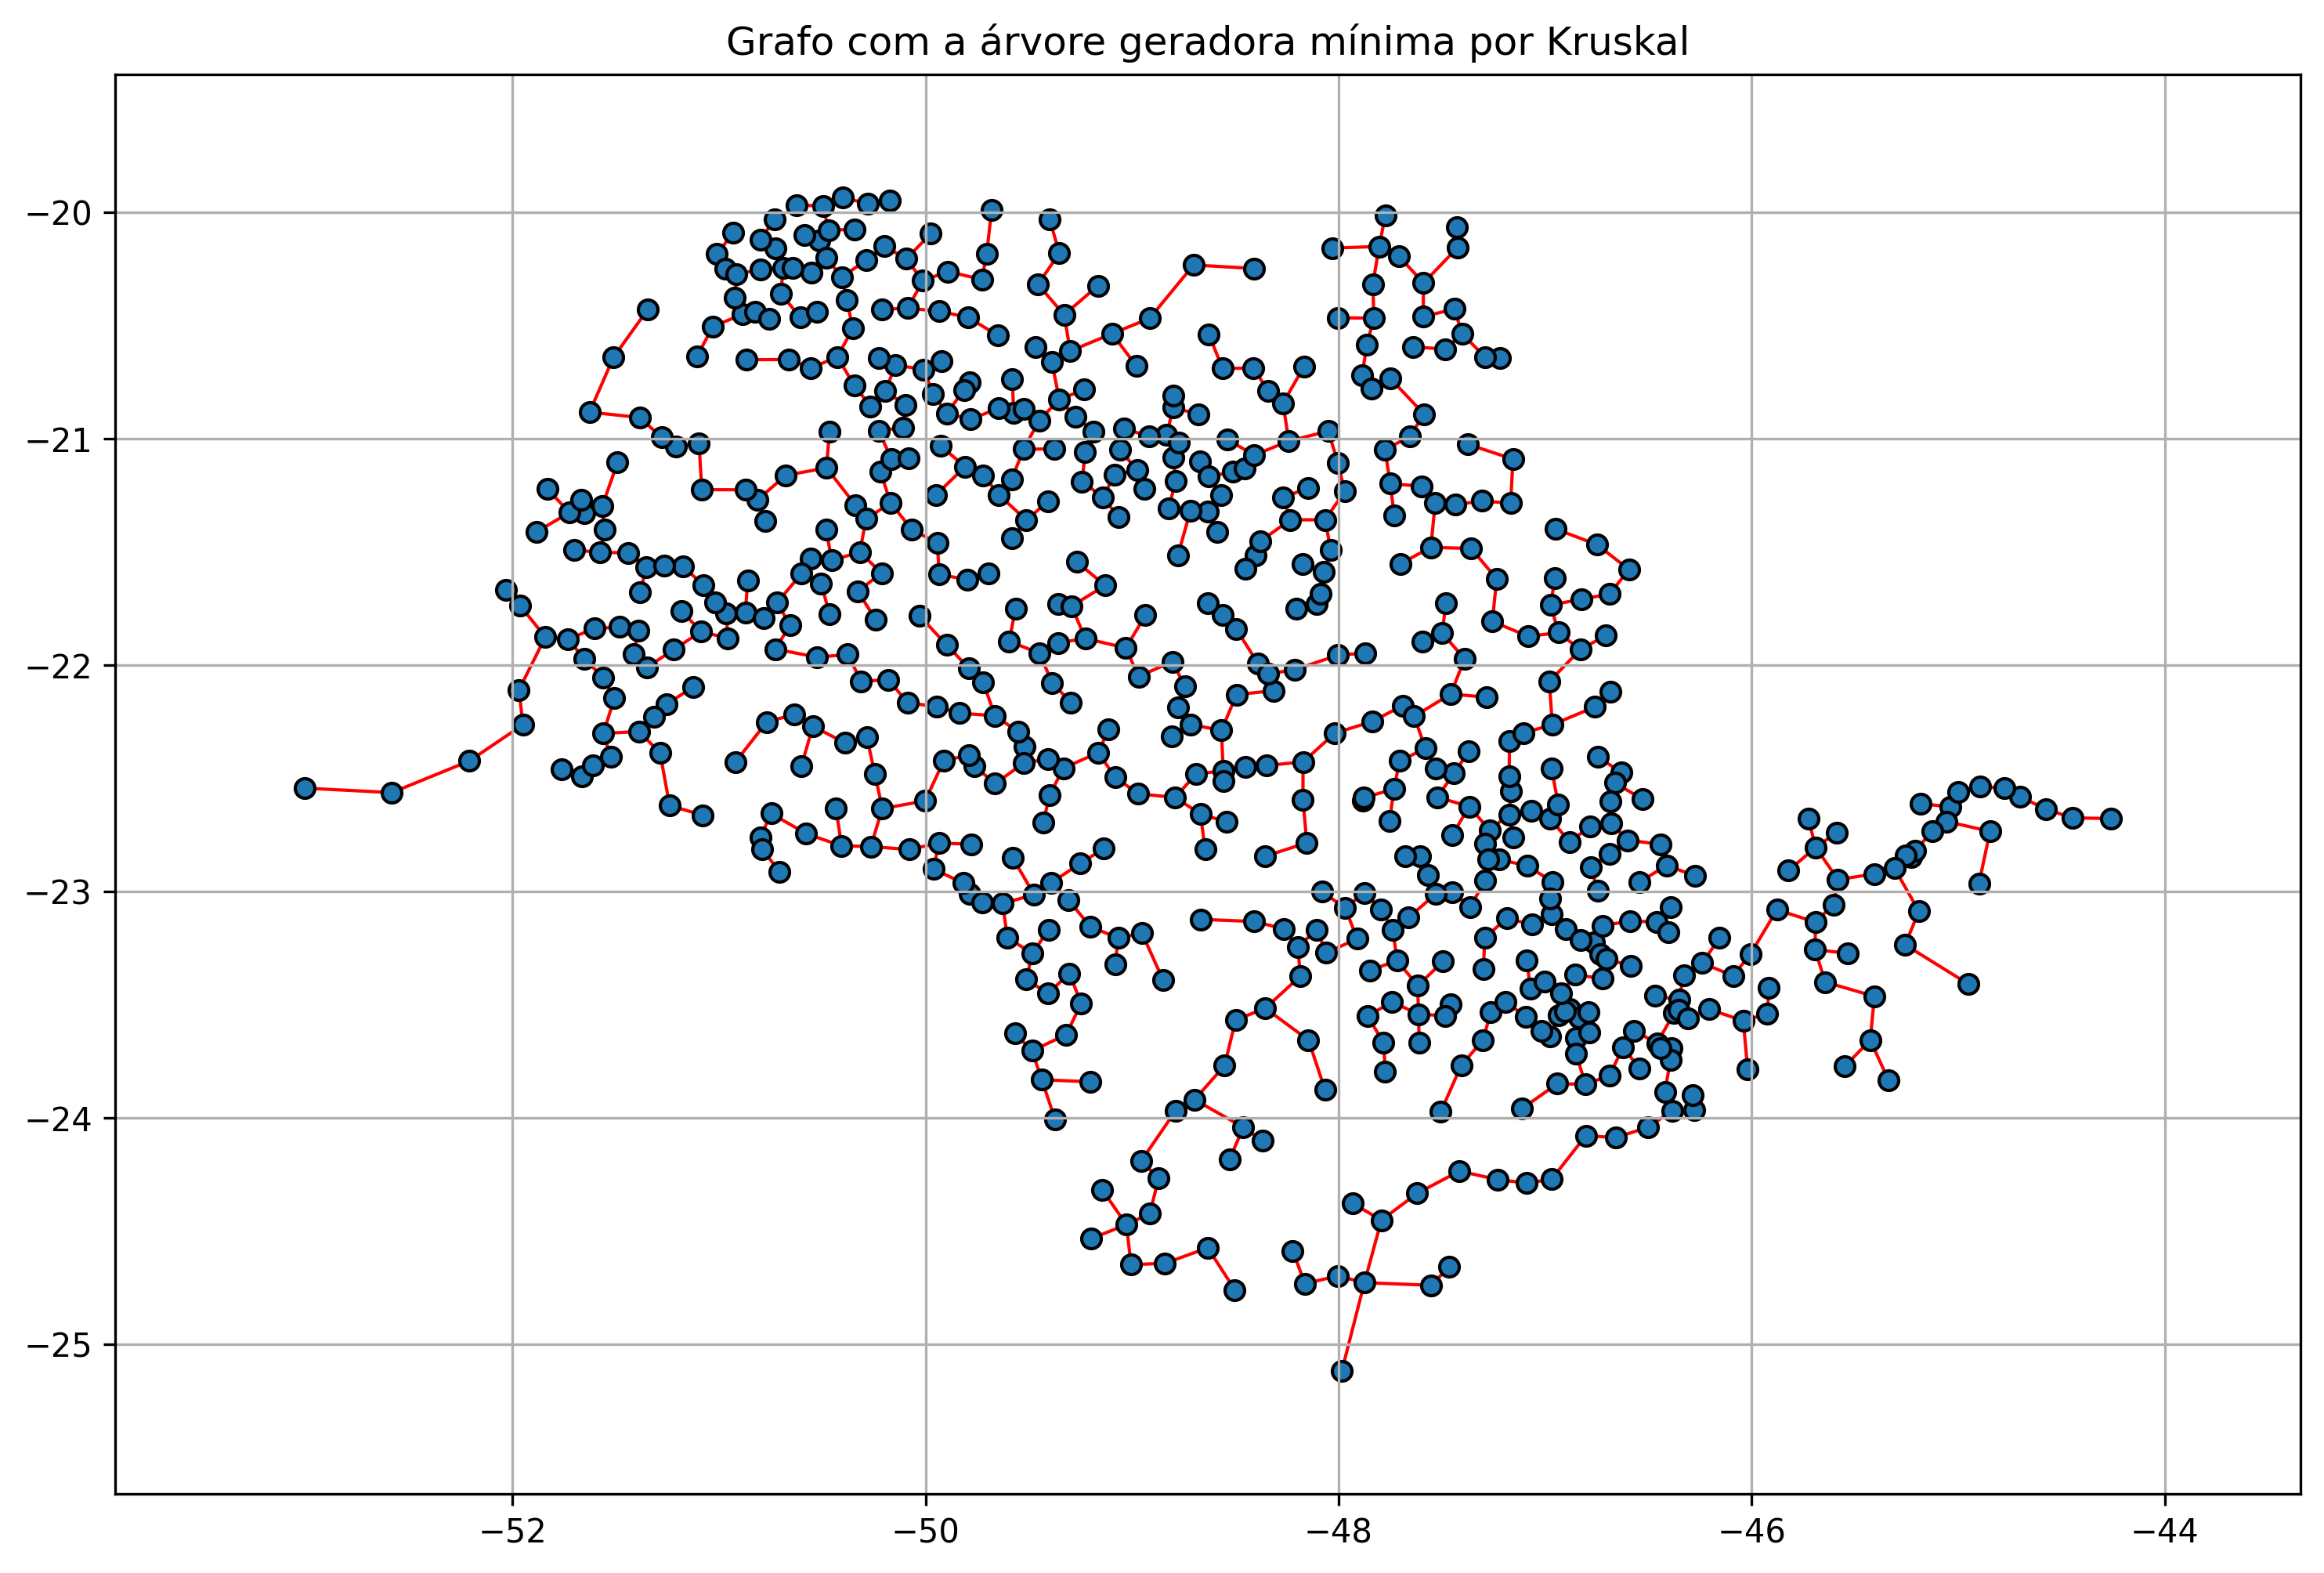

In [140]:
E = get_minimum_spanning_tree(SP, 'kruskal')

draw_graph(SP, has_edgeslabel = True, edgelist=E,title="Grafo com a árvore geradora mínima por Kruskal", bigTree= True)

In [141]:
tam = 0
attr = ntx.get_node_attributes(SP, "Cidade")
weight_attr = ntx.get_edge_attributes(SP, "weight")

resultado_cidades_conectadas = []

for el in E:
    resultado_cidades_conectadas.append({'Cidade 1': attr[el[0]], 'Cidade 2':attr[el[1]], 'Distância':weight_attr[el[0], el[1]]})

#Gerando os resultados e transformando em um dataframe
resultados_df = pd.DataFrame(resultado_cidades_conectadas)

In [142]:
sum(ntx.get_edge_attributes(SP, "weight").values())

57439576

In [143]:
def argmin(d):
    if not d: return None
    min_val = min(d.values())
    return [k for k in d if d[k] == min_val][0]

def argmax(d):
    if not d: return None
    min_val = max(d.values())
    return [k for k in d if d[k] == min_val][0]
    
val_argmin = argmin(ntx.get_edge_attributes(SP, "weight"))
val_argmax = argmax(ntx.get_edge_attributes(SP, "weight"))
print(val_argmin)
print(val_argmax)

(6, 565)
(55, 498)


In [144]:
#Cidades mais próximas
print('Cidade 1: ' +  attr[val_argmin[0]] + ' Cidade 2:  '+ attr[val_argmin[1]] + ' Distância:  ' + str(weight_attr[val_argmin[0], val_argmin[1]]))

Cidade 1: ÁGUAS DE SÃO PEDRO Cidade 2:  SÃO PEDRO Distância:  1


In [145]:
#Cidades mais distantes
print('Cidade 1: ' +  attr[val_argmax[0]] + ' Cidade 2:  '+ attr[val_argmax[1]] + ' Distância:  ' + str(weight_attr[val_argmax[0], val_argmax[1]]))

Cidade 1: BANANAL Cidade 2:  ROSANA Distância:  897


In [146]:
resultados_df.to_csv("ArvoreGeradoraMinimaResultado")